In [362]:
import scanpy as sc
# Read 10x dataset
import pandas as pd

In [363]:
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [364]:
# Make variable names (in this case the genes) unique
adata.var_names_make_unique() 

In [365]:
adata #chack data

AnnData object with n_obs × n_vars = 11843 × 31053
    var: 'gene_ids', 'feature_types', 'genome'

In [366]:
sc.tl.pca(adata)

In [367]:
adata

AnnData object with n_obs × n_vars = 11843 × 31053
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

... storing 'feature_types' as categorical
... storing 'genome' as categorical


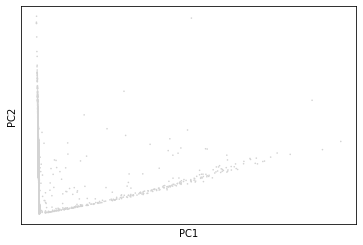

In [368]:
#Make PCA with unfiltered data
adata_unfil = sc.pl.pca(adata,save='Unfiltered PCA')
adata_unfil 

In [396]:
#Load data again to make it filtered
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [397]:
adata.var_names_make_unique()

In [398]:
sc.pp.recipe_zheng17(adata) #Filter according to Zheng '17

In [399]:
sc.tl.pca(adata)

In [400]:
adata

AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

... storing 'feature_types' as categorical
... storing 'genome' as categorical


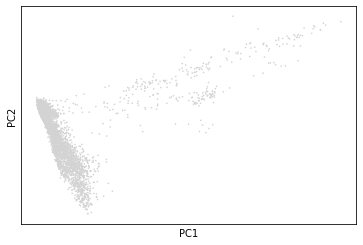

In [401]:
adata_fil = sc.pl.pca(adata, save = 'Filtered PCA')

In [402]:
#Run clustering according to leiden
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

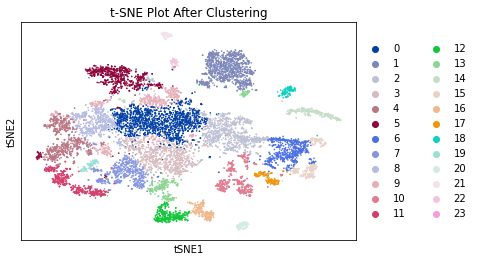

In [403]:
#Make t-SNE plot according to clustering
sc.tl.tsne(adata)
sc.pl.tsne(adata, color="leiden", color_map = "viridis", title = "t-SNE Plot After Clustering", outline_color = "black", save = 't-SNE Plot After Clustering')

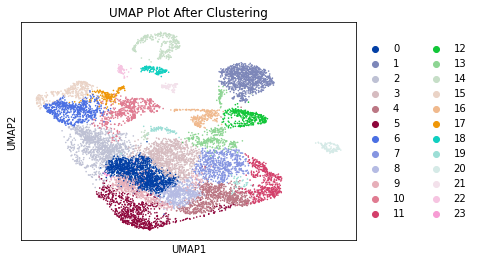

In [404]:
#Make UMAP plot according to clustering
sc.tl.umap(adata)
sc.pl.umap(adata, color="leiden", color_map = "viridis", title = "UMAP Plot After Clustering", outline_color = "black", save = 'UMAP Plot After Clustering')

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


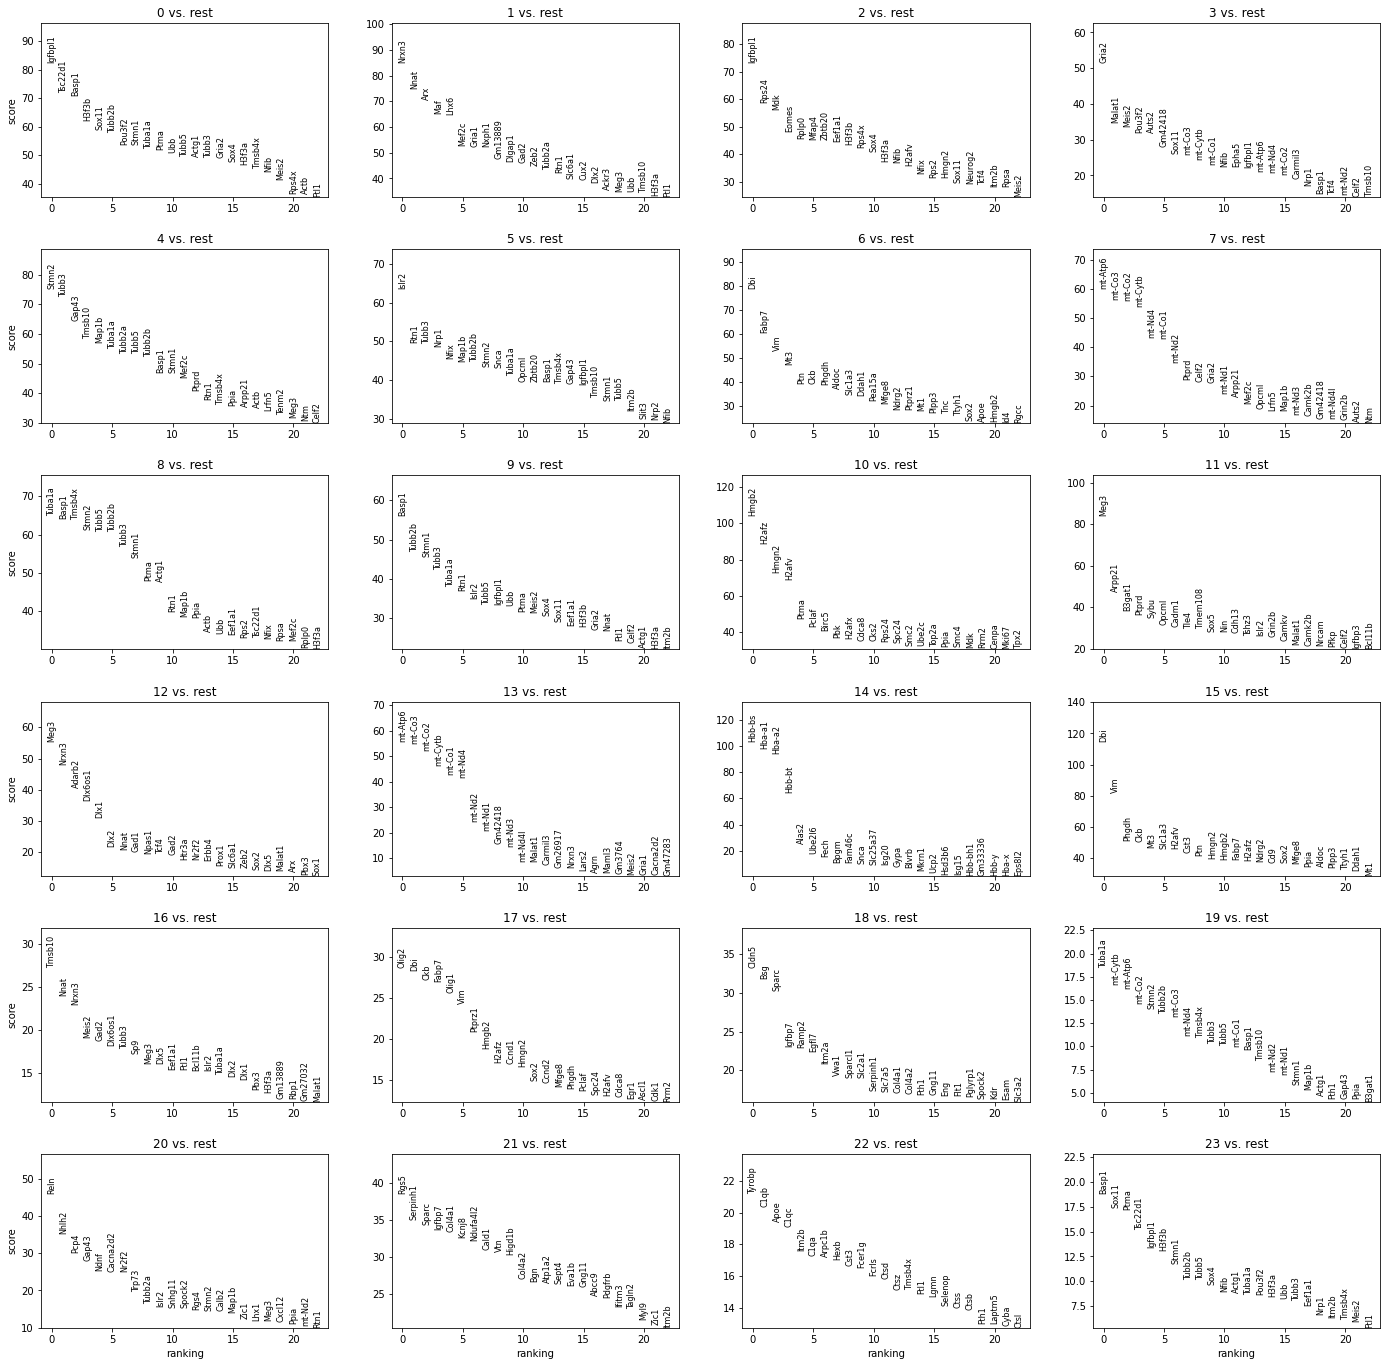

In [405]:
#Rank genes according to their expression through a t-test
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
results = sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=23, sharey=False, save = 'Gene Ranking t-test')

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


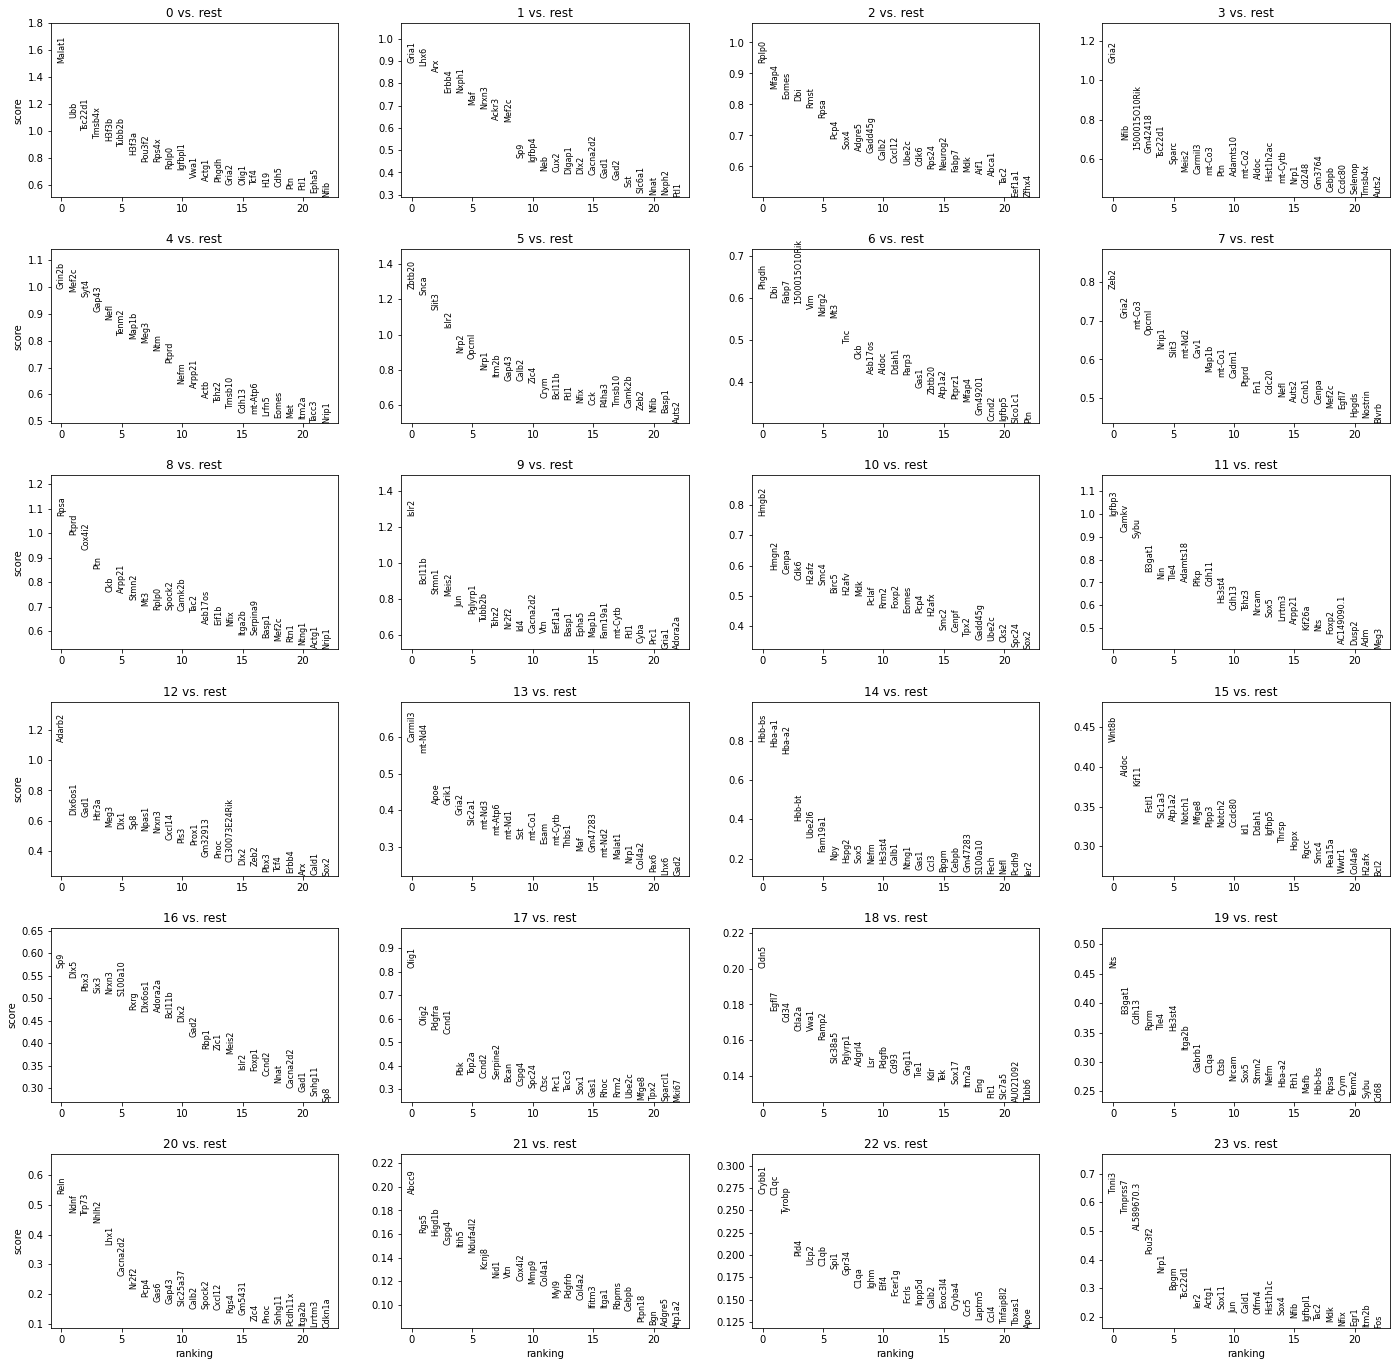

In [406]:
#Rank genes according to their expression through logistic regression
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=23, sharey=False, save = 'Gene Ranking Logistic Regression')

In [407]:
#Make a Data Frame with the most expressed genes in the different clusters 
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Malat1,Gria1,Rplp0,Gria2,Grin2b,Zbtb20,Phgdh,Zeb2,Rpsa,Islr2,...,Hbb-bs,Wnt8b,Sp9,Olig1,Cldn5,Nts,Reln,Abcc9,Crybb1,Tnni3
1,Ubb,Lhx6,Mfap4,Nfib,Mef2c,Snca,Dbi,Gria2,Ptprd,Bcl11b,...,Hba-a1,Aldoc,Dlx5,Olig2,Egfl7,B3gat1,Ndnf,Rgs5,C1qc,Tmprss7
2,Tsc22d1,Arx,Eomes,1500015O10Rik,Syt4,Slit3,Fabp7,mt-Co3,Cox4i2,Stmn1,...,Hba-a2,Kif11,Pbx3,Pdgfra,Cd34,Cdh13,Trp73,Higd1b,Tyrobp,AL589670.3
3,Tmsb4x,Erbb4,Dbi,Gm42418,Gap43,Islr2,1500015O10Rik,Opcml,Ptn,Meis2,...,Hbb-bt,Fstl1,Six3,Ccnd1,Ctla2a,Rprm,Nhlh2,Cspg4,Pld4,Pou3f2
4,H3f3b,Nxph1,Rmst,Tsc22d1,Nefl,Nrp2,Vim,Nrip1,Ckb,Jun,...,Ube2l6,Slc1a3,Nrxn3,Pbk,Vwa1,Tle4,Lhx1,Itih5,Ucp2,Nrp1


/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


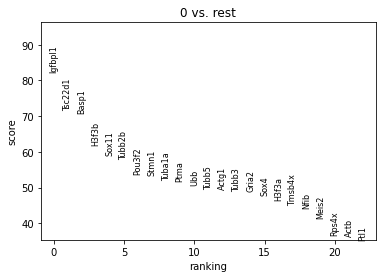

In [408]:
#Rank the most expressed genes
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=23, save = 'Single Cluster for Most Expressed Genes')

In [416]:
#Make a list of marker genes
marker_genes = ['Igfbpl1', 'Tsc22d1', 'Basp1','H3f3b','Sox11','Tubb2b','Pou3f2','Stmn1']

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

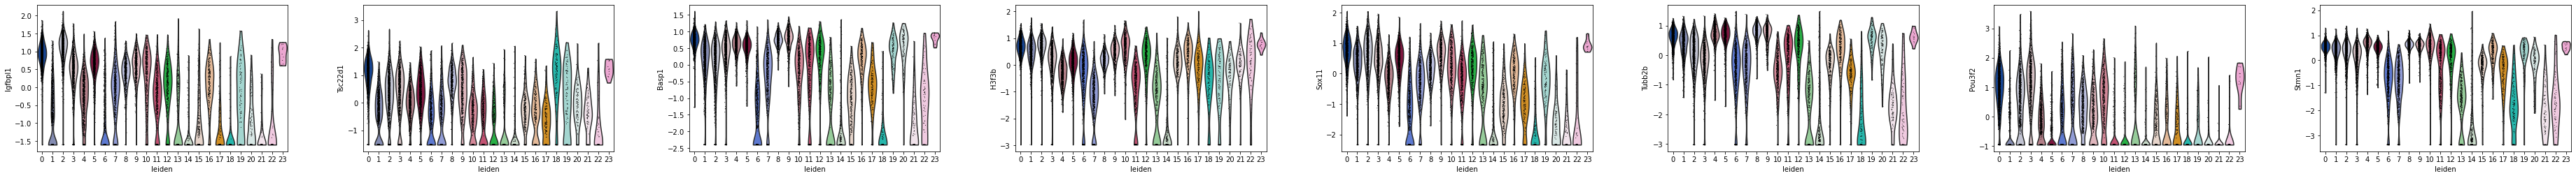

In [410]:
#Make a violin plot to compare a certain gene across groups and check their expression
sc.pl.violin(adata, ['Igfbpl1', 'Tsc22d1', 'Basp1','H3f3b','Sox11','Tubb2b','Pou3f2','Stmn1'], groupby='leiden', title = "Gene Comparisson Across Groups", save = 'Gene Comparisson Across Groups')

In [411]:
#Make new cluster names according to their expression data
#Data was categorized according to PanglaoDB
#Some categories include known cell types and the others their most prominent gene
new_cluster_names = ['Neuroblast Olfactory bulb', 'Neuron Substantia nigra','Neuron Stria terminalis','Neuron Retinal ganglion cells','Nauran Stem Subventricular zone', 'Oligodendrocytes','Stria terminalis (brain)','Hypothalamus','Unknown1','Unknown2','Unknown3','Unknown4','Unknown5','Unknown6','Unknown7','Unknown8','Unknown9','Unknown10','Unknown11','Unknown12','Unknown13','Unknown14','Unknown15','Unknown16']

In [412]:
#Rename Clusters
adata.rename_categories('leiden', new_cluster_names)

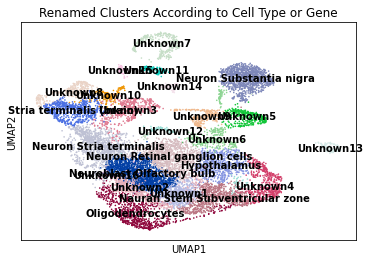

In [413]:
#Make UMAP with new data
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='Renamed Clusters According to Cell Type or Gene', save = 'Renamed Clusters According to Cell Type or Gene')

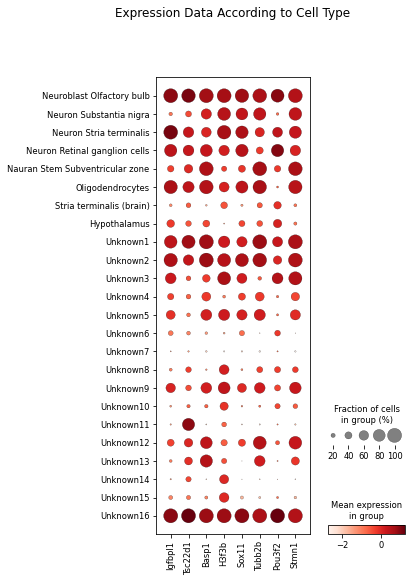

In [417]:
#Look at gene expression according to new cell type
sc.pl.dotplot(adata, marker_genes, groupby='leiden', title = 'Expression Data According to Cell Type', save = 'Expression Data According to Cell Type')

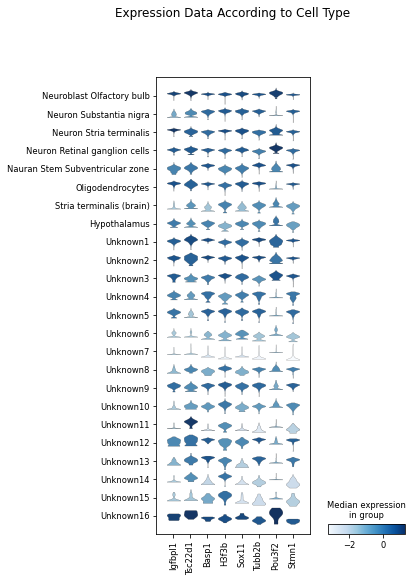

In [418]:
#Look at gene expression according to new cell type
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=45,title = 'Expression Data According to Cell Type', save = 'Expression Data According to Cell Type')